# ACT-R Model of Markov Task 


This notebook tests whether MB and MF run properly in ACT-R

In [1]:
from markov_device import *
import matplotlib.pyplot as plt
import seaborn as sns

ACT-R connection has been started.


In [2]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model2', verbose=False)

In [3]:
m.run_experiment(50)

In [4]:
m.log[:10]

[<[MARKOV_STATE] 	[f, 1.61]'A1' 	[f, 7.78]'C1' 	R:[0] 	[R][C],
 <[MARKOV_STATE] 	[f, 1.44]'A1' 	[f, 1.42]'B1' 	R:[2] 	[C][C],
 <[MARKOV_STATE] 	[k, 1.52]'A2' 	[f, 7.88]'C1' 	R:[0] 	[C][C],
 <[MARKOV_STATE] 	[f, 1.20]'A1' 	[k, 7.88]'C2' 	R:[0] 	[R][C],
 <[MARKOV_STATE] 	[k, 1.40]'A2' 	[k, 7.78]'C2' 	R:[0] 	[C][C],
 <[MARKOV_STATE] 	[k, 1.42]'A2' 	[f, 1.47]'B1' 	R:[2] 	[R][C],
 <[MARKOV_STATE] 	[k, 1.54]'A2' 	[k, 7.78]'C2' 	R:[0] 	[C][C],
 <[MARKOV_STATE] 	[f, 1.46]'A1' 	[f, 1.35]'B1' 	R:[2] 	[C][C],
 <[MARKOV_STATE] 	[k, 1.54]'A2' 	[f, 1.53]'B1' 	R:[0] 	[R][R],
 <[MARKOV_STATE] 	[f, 1.18]'A1' 	[k, 7.88]'C2' 	R:[0] 	[R][C]]

## Stay Probability

Stay: at n trial, choose `LEFT`, and at n+1 trial, still chooses `LEFT`

Prob(Stay): The probablity of choosing the same action in two consecutive trials

In [5]:
df = m.calculate_stay_probability()

In [6]:
df_state1stay = df.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index()
df_state1stay

,received_reward,reward_frequency,state_frequency,state1_stay
0,0,common,common,0.181818
1,0,common,rare,0.571429
2,0,rare,common,1.000000
3,0,rare,rare,0.500000
4,2,common,common,0.333333
5,2,common,rare,0.428571


In [7]:
print("gained rewards: %d" % (df['received_reward'].sum()))

gained rewards: 40


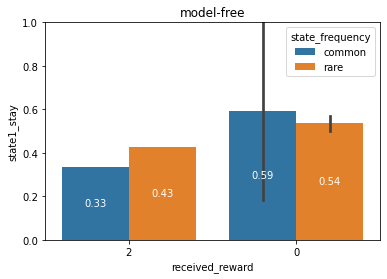

In [8]:
ax = sns.barplot(data=df_state1stay, x='received_reward', y='state1_stay',
                 order = sorted(df['received_reward'].unique(), reverse=True), 
                 hue='state_frequency')
ax.set(ylim=(0, 1))
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
plt.title('model-free')
plt.show()

## Sanity Check: State Transition Probability 

This table shows the REAL state transition probability (calculated post-hoc). 

In [9]:
m.calculate_real_frequency().round(2)

,state1_selected_stimulus,state1_frequency,state2_selected_stimulus_type,state2_frequency1,state2_frequency2
0,A1,0.6,B,0.53,NaN
1,A1,0.6,C,0.47,NaN
2,A2,0.4,NaN,NaN,NaN
3,A2,NaN,C,NaN,0.55
4,A2,NaN,B,NaN,0.45


## Sanity Check:

To see how model learns across time

In [10]:
def test1(m):
    m.run_experiment(50)
    df = m.calculate_stay_probability()
    df_state1stay = df.groupby(['received_reward', 'reward_frequency', 'state_frequency']).agg({'state1_stay': lambda x: x.mean(skipna=True)}).reset_index()
    
    print("gained rewards: %.2f" % (df['received_reward'].sum()/len(df)))
    ax = sns.barplot(data=df_state1stay, x='received_reward', y='state1_stay',
                 order = sorted(df['received_reward'].unique(), reverse=True), 
                 hue='state_frequency')
    ax.set(ylim=(0, 1))
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', color='white')
    plt.title('model-free')
    plt.show()

In [11]:
m = MarkovACTR(setup=False)
m.setup(model='markov-model1', verbose=False, reload=True)

gained rewards: 0.88


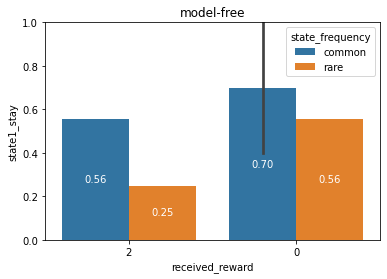

In [12]:
test1(m)

gained rewards: 0.90


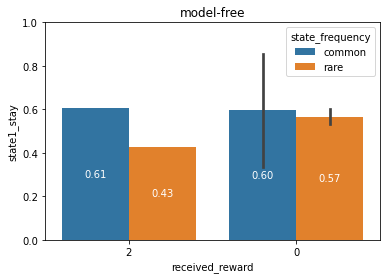

In [13]:
m.setup(reload=False)
test1(m)

gained rewards: 0.85


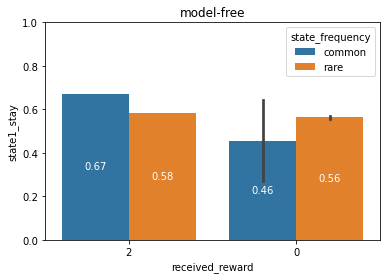

In [14]:
m.setup(reload=False)
test1(m)